In [1]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg, F
from multiprocess import Pool
from functools import partial
import numpy as np
from functools import partial
from scipy.sparse import coo_matrix, csr_matrix, find, tril
import networkx as nx
import random

sys.path.append('/home/galm/software/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1457
q = Query.objects.get(pk=qid)
docs = Doc.objects.filter(query=q)

In [2]:
health=docs.filter(wc__oecd='Medical and Health Sciences')
health.count()

14712

In [3]:
bysub = health.values('wc__text').annotate(
    n = Count('pk'),
    cluster_n = models.Sum(
        models.Case(
            models.When(networkproperties__value=8,then=1),default=0, output_field=models.FloatField())
        )
    )

In [4]:
df =  pd.DataFrame.from_dict(list(bysub)).sort_values('n',ascending=False)
df.head()

,cluster_n,n,wc__text
53,542.0,3368,"Public, Environmental & Occupational Health"
29,302.0,1453,Health Care Sciences & Services
45,129.0,930,"Medicine, General & Internal"
57,44.0,671,Nutrition & Dietetics
13,24.0,594,Pharmacology & Pharmacy


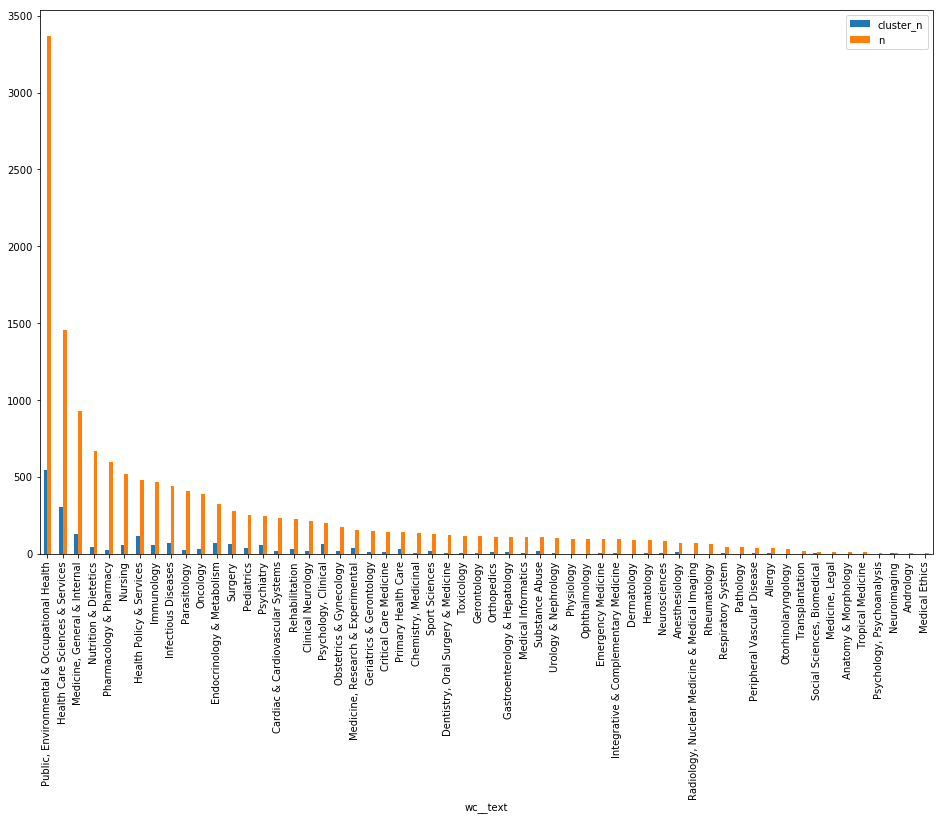

In [5]:
plt.rcParams["figure.figsize"] = [16,10]
pdf = df.set_index('wc__text')
pdf.plot.bar()
plt.show()

In [6]:
df =  pd.DataFrame.from_dict(list(bysub)).sort_values('wc__text')
df

,cluster_n,n,wc__text
26,2.0,36,Allergy
21,0.0,10,Anatomy & Morphology
40,0.0,5,Andrology
1,11.0,68,Anesthesiology
30,15.0,230,Cardiac & Cardiovascular Systems
12,2.0,137,"Chemistry, Medicinal"
46,20.0,214,Clinical Neurology
3,9.0,141,Critical Care Medicine
48,3.0,123,"Dentistry, Oral Surgery & Medicine"
51,1.0,92,Dermatology


In [7]:
sqs = [1416,1457,1373]
qs = Query.objects.filter(pk__in=sqs)
rdocs = docs.filter(
    docownership__relevant__gt=0,
    docownership__relevant__isnull=False,
    docownership__query__in=qs
).distinct()
rdocs.count()

1460

   docownership__relevant    n    per
0                       1  769  50.4%
1                       2  671  44.0%
2                       3   86   5.6%


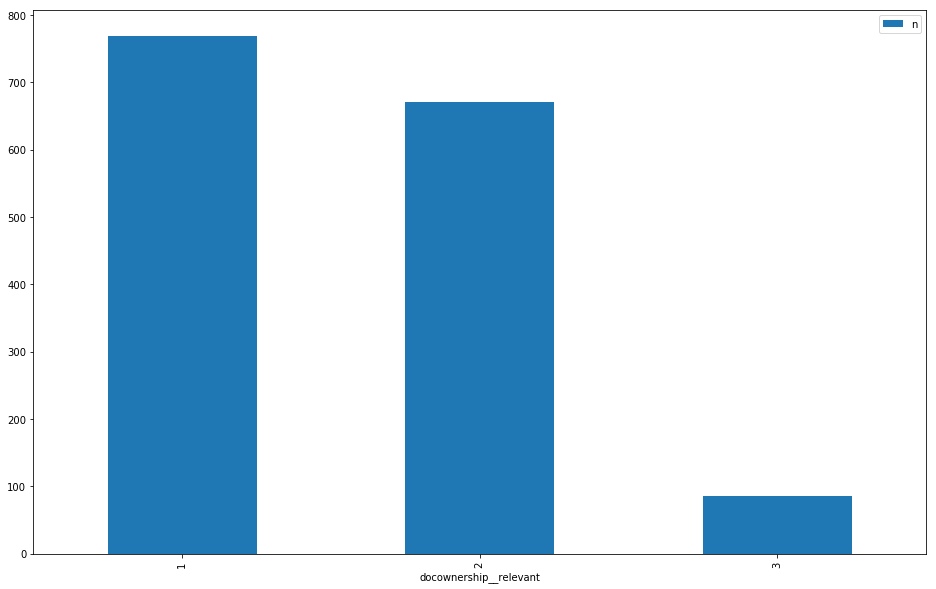

In [8]:
byrating = rdocs.values('docownership__relevant').annotate(
    n = Count('pk')
)
rdf =  pd.DataFrame.from_dict(list(byrating)).sort_values('n',ascending=False)
pdf = rdf.set_index('docownership__relevant')
rdf['per'] = (rdf.n * 100 / rdf.n.sum()).round(1).astype(str) + '%'
print(rdf.head())
pdf.plot.bar()
plt.show()

In [9]:
byrating = rdocs.values('docownership__relevant','networkproperties__value').annotate(
    n = Count('pk')
)
rdf =  pd.DataFrame.from_dict(list(byrating)).sort_values('n',ascending=False)

gdf = rdf.groupby('networkproperties__value')

gdf.head()



,docownership__relevant,n,networkproperties__value
77,2,344,NaN
44,1,338,NaN
48,1,131,14.0
50,2,100,14.0
49,2,87,8.0
2,2,43,33.0
78,1,41,16.0
23,1,41,5.0
52,3,39,NaN
28,1,38,4.0


    docownership__relevant    n  networkproperties__value
77                       2  344                       NaN
44                       1  338                       NaN
48                       1  131                      14.0
50                       2  100                      14.0
49                       2   87                       8.0


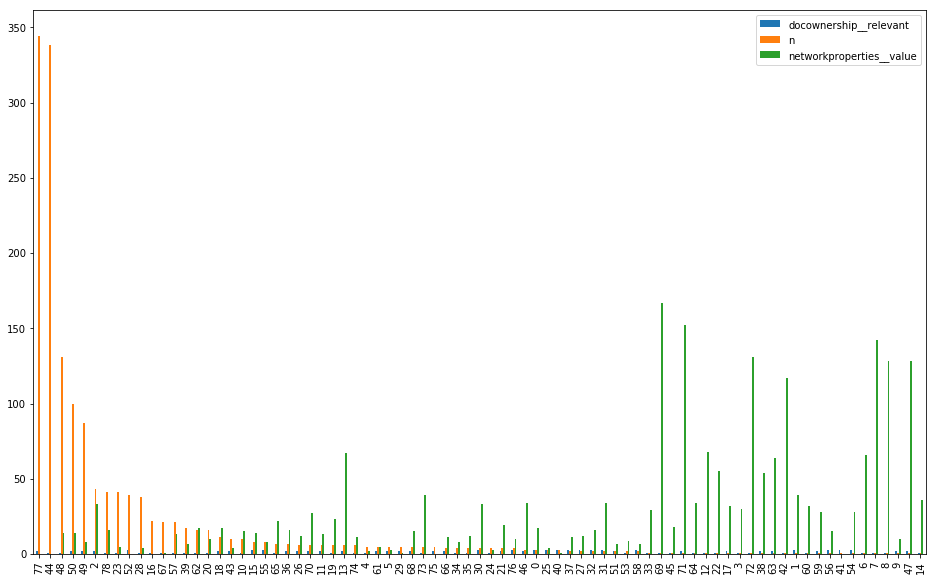

In [10]:

pdf = rdf.set_index('docownership__relevant')

print(rdf.head())
rdf.plot.bar()
plt.show()

In [ ]:
t = Tag.objects.get(title='Nutrition & Dietetics')

In [ ]:
mdocs = Doc.objects.filter(
    docownership__tag__title='Nutrition & Dietetics',
    docownership__user__username='galm',
    docownership__relevant__lt=2
)
mdocs.count()


In [ ]:
for d in mdocs:
    do = DocOwnership(
        query = q,
        tag = t,
        user = User.objects.get(username="minj"),
        doc=d
    )
    do.save()

In [11]:
gbgs = [
    'develop','agricultur','energi',
    'product','forest','water','land',
    'citi','public','use','urban','futur',
    'growth','transport','tourism','harvest',
    'food','crop','livelihood'
]
gbg_1s = [
    'environment','ecolog','social','agricultur'
]
good_health = health.filter(
    docbigram__bigram__pos=1,
    docbigram__bigram__stem2__in=gbgs
) | health.filter(
    docbigram__bigram__pos=-1,
    docbigram__bigram__stem2__in=gbg_1s
)
bad_health = health.exclude(
    docbigram__bigram__pos=1,
    docbigram__bigram__stem2__in=gbgs
).exclude(
    docbigram__bigram__pos=-1,
    docbigram__bigram__stem2__in=gbg_1s
)
print(good_health.distinct().count())
print(bad_health.distinct().count())

1748
12468


In [ ]:
t = Tag(
    query=q,
    title="good_word_health_2"
)
t.save()
for d in good_health:
    d.tag.add(t)

In [ ]:
t = Tag(
    query=q,
    title="bad_word_health_2"
)
t.save()
for d in bad_health:
    d.tag.add(t)

In [ ]:
hcs = health.values('networkproperties__value').annotate(
    n = Count('pk')
)
hcdf =  pd.DataFrame.from_dict(list(hcs)).sort_values('n',ascending=False)

pdf = hcdf.set_index('networkproperties__value')
pdf.plot.bar()
plt.show()

In [ ]:
sqs = [1416,1457,1373]
qs = Query.objects.filter(pk__in=sqs)
rdocs = docs.filter(
    docownership__relevant__gt=0,
    docownership__relevant__isnull=False,
    docownership__query__in=qs,
    docbigram__bigram__pos=1
).distinct()

bybg = rdocs.values('docbigram__bigram__stem2').annotate(
    yes = models.Sum(
        models.Case(
            models.When(docownership__relevant=1,then=1),default=0, output_field=models.FloatField())
    ),
    no = models.Sum(
        models.Case(
            models.When(docownership__relevant=2,then=1),default=0, output_field=models.FloatField())
    ),
    n = models.Count('pk')
)

bdf = pd.DataFrame.from_dict(list(bybg))
bdf['av'] = bdf['yes']/bdf['n']
bdf.sort_values('n',ascending=False)

In [ ]:
sqs = [1416,1457,1373]
qs = Query.objects.filter(pk__in=sqs)
rdocs = docs.filter(
    docownership__relevant__gt=0,
    docownership__relevant__isnull=False,
    docownership__query__in=qs,
    docbigram__bigram__pos=-1
).distinct()

bybg = rdocs.values('docbigram__bigram__stem2').annotate(
    yes = models.Sum(
        models.Case(
            models.When(docownership__relevant=1,then=1),default=0, output_field=models.FloatField())
    ),
    no = models.Sum(
        models.Case(
            models.When(docownership__relevant=2,then=1),default=0, output_field=models.FloatField())
    ),
    n = models.Count('pk')
)

bdf = pd.DataFrame.from_dict(list(bybg))
bdf['av'] = bdf['yes']/bdf['n']
bdf.sort_values('n',ascending=False)

In [ ]:
bwcs = WC.objects.filter(oecd_fos_text='Economics and business')
for b in bwcs:
    bdocs=docs.filter(wc__text=b.text).distinct()
    if bdocs.count() > 600:
        t = Tag(
            query=q,
            title=b.text+"_2"
        )
        t.save()
        for d in bdocs:
            d.tag.add(t)  


In [12]:

business=docs.filter(wc__oecd_fos_text='Economics and business').distinct()


In [36]:
kwp = docs.filter(
    wosarticle__kwp__icontains="sustainab"
).exclude(
    title__icontains="sustainab"
).exclude(
    content__icontains="sustainab"
).exclude(
    wosarticle__de__icontains="sustainab"
).exclude(
    wosarticle__so__icontains="sustainab"
)
kwp.distinct().count()
t = Tag(
    query=q,
    title="kwp_only"
)
t.save()
for d in kwp:
    d.tag.add(t)

In [37]:
print(kwp.count())

7751


In [ ]:
print(kwp.first().title)
kwp.first().content

In [ ]:
for k in kwp[:5]:
    print(k.title)
    print(k.content)

In [ ]:
print(docs.count())
print(docs.filter(docbigram__isnull=True).count())


In [ ]:
def build_docset(rdocs):
    ids = pd.DataFrame.from_dict(list(rdocs.values(
        'UT','docownership__relevant'
    )))
    bdf = pd.DataFrame.from_dict(list(rdocs.values(
        'UT','docownership__relevant','docbigram__bigram__stem2'
    )))
    
    bdf['value'] = 1
    bdf = bdf.pivot_table(
        index=['UT','docownership__relevant'],
        columns='docbigram__bigram__stem2',
        values='value'
    ).fillna(0).reset_index()
    len(bdf)
    wcdf = pd.DataFrame.from_dict(list(rdocs.values(
        'UT','wc__text'
    )))
    wcdf['value'] = 1
    wcdf = wcdf.pivot_table(
        index=['UT'],
        columns='wc__text',
        values='value'
    ).fillna(0).reset_index()
    bdf = bdf.merge(wcdf)
    topics = rdocs.filter(
        doctopic__run_id=195
    ).values(
        'UT',
        'doctopic__topic__title',
        'doctopic__topic__score'
    )
    tdf = pd.DataFrame.from_dict(list(topics))
    tdf = tdf.pivot_table(
        index=['UT'],
        columns='doctopic__topic__title',
        values='doctopic__topic__score'
    ).fillna(0).reset_index()
    tdf.head()

    bdf = bdf.merge(tdf)
    return(bdf)

In [14]:
sqs = [1416,1457,1373]
qs = Query.objects.filter(pk__in=sqs)
rdocs = docs.filter(
    docownership__relevant__gt=0,
    docownership__relevant__lt=3,
    docownership__relevant__isnull=False,
    docownership__query__in=qs,
    docbigram__bigram__pos=1
).distinct()

bdf = build_docset(rdocs)
bdf.shape

NameError: name 'build_docset' is not defined

In [9]:
bgs = Bigram.objects.filter(pos=1).values(
    'stem2'
).annotate(
    n=Count('pk')
).order_by('-n')[:100]
bgs = bgs.values_list('pk',flat=True)

In [10]:
alldocs = docs.filter(
    docbigram__bigram__pos=1,
    docbigram__in=bgs
) | docs.filter(docbigram__isnull=True)
alldocs = alldocs.distinct()

ids = pd.DataFrame.from_dict(list(rdocs.values(
    'UT','docownership__relevant'
)))
ids.loc[ids.docownership__relevant==2, 'docownership__relevant'] = 0


bdf = pd.DataFrame.from_dict(list(alldocs.values(
    'UT','docbigram__bigram__stem2'
)))
bdf['value'] = 1
bdf = bdf.pivot_table(
    index=['UT'],
    columns='docbigram__bigram__stem2',
    values='value'
).fillna(0).reset_index()

wcdf = pd.DataFrame.from_dict(list(alldocs.values(
    'UT','wc__text'
)))
wcdf['value'] = 1
wcdf = wcdf.pivot_table(
    index=['UT'],
    columns='wc__text',
    values='value'
).fillna(0).reset_index()

bdf = bdf.merge(wcdf)

topics = alldocs.filter(
doctopic__run_id=195
).values(
    'UT',
    'doctopic__topic__title',
    'doctopic__topic__score'
)
tdf = pd.DataFrame.from_dict(list(topics))
tdf = tdf.pivot_table(
    index=['UT'],
    columns='doctopic__topic__title',
    values='doctopic__topic__score'
).fillna(0).reset_index()
tdf.head()

bdf = bdf.merge(tdf)



In [11]:
#wcdf
bdf

,UT
docbigram__bigram__stem2,


In [ ]:
bdf.shape

In [ ]:
abdf = bdf.merge(ids,'left')
abdf.shape

In [ ]:
train = bdf.merge(ids)
train.shape

In [ ]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

X = bdf.ix[:,2:760]
y = bdf['docownership__relevant']

model = ExtraTreesClassifier()
model.fit(X,y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    fe = bdf.columns[indices[f]]
    m = bdf.loc[bdf[fe]>0, 'docownership__relevant'].mean()
    n = bdf.loc[bdf[fe]>0, 'docownership__relevant'].count()
    #m = bdf[bdf[fe]==1].mean('docownership__relevant')
    print("%d. feature %s, mean score: %f, n: %d relevance (%f)" % 
          (f + 1, bdf.columns[indices[f]], m, n, importances[indices[f]])
     )

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [ ]:
tdocs = docs.filter(
    docbigram__bigram__pos=1#,
    #docownership__isnull=True
).exclude(
    docownership__query__in=qs,
    docownership__relevant__gt=0
).distinct()
ids = tdocs.values_list('UT',flat=True)
rand_ids = random.sample(list(ids), 100)
tdocs = tdocs.filter(UT__in=rand_ids)

tdf = build_docset(tdocs)
tdf.shape



In [ ]:
radocs

In [ ]:
tdf = build_docset(tdocs)
tdf.shape

In [ ]:
nobgs = docs.filter(docbigram__isnull=True)
for d in nobgs[:10]:
    print('################\n')
    print(d.title)
    print(d.content)

In [ ]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X, y)

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %ss else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X[i, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

In [ ]:
X

In [14]:
bdocs = docs.filter(wc__oecd_fos_text='Economics and business')
bdocs.distinct().count()

11205

In [24]:
for pos in [-1,1]:
    badbdocs = bdocs.filter(
        docownership__query__in=sqs,
        docownership__relevant=2,
        docbigram__bigram__pos=pos
    )

    badbdocs = badbdocs.values('docbigram__bigram__stem2').annotate(
        n = Count('UT')
    ).order_by('-n')
    print(pos)
    print(list(badbdocs.values('docbigram__bigram__stem2','n')))


-1
[{'n': 5, 'docbigram__bigram__stem2': 'term'}, {'n': 5, 'docbigram__bigram__stem2': 'collus'}, {'n': 5, 'docbigram__bigram__stem2': 'achiev'}, {'n': 4, 'docbigram__bigram__stem2': 'creat'}, {'n': 4, 'docbigram__bigram__stem2': 'sourc'}, {'n': 4, 'docbigram__bigram__stem2': 'fiscal'}, {'n': 4, 'docbigram__bigram__stem2': 'influenc'}, {'n': 4, 'docbigram__bigram__stem2': 'the'}, {'n': 4, 'docbigram__bigram__stem2': 'un'}, {'n': 3, 'docbigram__bigram__stem2': 'studi'}, {'n': 3, 'docbigram__bigram__stem2': 'develop'}, {'n': 3, 'docbigram__bigram__stem2': 'analysi'}, {'n': 3, 'docbigram__bigram__stem2': 'ensur'}, {'n': 2, 'docbigram__bigram__stem2': 'realis'}, {'n': 2, 'docbigram__bigram__stem2': 'financi'}, {'n': 2, 'docbigram__bigram__stem2': 'model'}, {'n': 2, 'docbigram__bigram__stem2': 'perform'}, {'n': 2, 'docbigram__bigram__stem2': 'program'}, {'n': 2, 'docbigram__bigram__stem2': 'provid'}, {'n': 2, 'docbigram__bigram__stem2': 'quest'}, {'n': 2, 'docbigram__bigram__stem2': 'suppor

In [16]:
badbgs = [
    'cooper','competit','equilibrium',
    'collus','advantag','profit','tacit',
    'change','improv','outcom','success',
    'allianc','tqm','brand','perform'
]
badbg_1s = [
    'collus','cartel','roi','leverag','price'
]
bad_business = bdocs.filter(
    docbigram__bigram__pos=1,
    docbigram__bigram__stem2__in=badbgs,
    
) | bdocs.filter(
    docbigram__bigram__pos=-1,
    docbigram__bigram__stem2__in=badbg_1s
)
good_business = bdocs.exclude(
    docbigram__bigram__pos=1,
    docbigram__bigram__stem2__in=badbgs
).exclude(
    docbigram__bigram__pos=-1,
    docbigram__bigram__stem2__in=badbg_1s
)
print(good_business.distinct().count())
print(bad_business.distinct().count())

10018
1041


In [54]:
t = Tag(
    query=q,
    title="good_business_4"
)
t.save()
for d in good_business:
    d.tag.add(t)
    
t = Tag(
    query=q,
    title="bad_business_4"
)
t.save()
for d in bad_business:
    d.tag.add(t)

Further exclude docs only containing "self-sustainable" and "sustainable performance"

In [29]:
bad_self = docs.filter(content__icontains="self-sustain")
bsids = list(bad_self.values_list('UT',flat=True))
#bad_self = bad_self.exclude(content__iregex=r'((?!self-)sustai)+')
bad_self_2 = bad_self
for d in bad_self:
    if re.match(".*(?<!self-)+sustai",d.content):
        bad_self_2 = bad_self_2.exclude(UT=d.UT)
print(bad_self.count())
print(bad_self_2.count())

510
310


In [30]:
for d in bad_self_2[0:10]:
    print('\n#####################\n')
    print(d.title)
    print(d.content)


#####################

Sustaining change in upper level courses: peer-led workshops in organic chemistry and biochemistry
Our peer-led collaborative learning groups, called Workshops, have now had extended success in two upper-level courses in chemistry and biochemistry. These Workshops are in turn supported by a third upper-level course for training peer-leaders. Our data confirm that the initial positive results from the introduction of Workshops in organic chemistry and in biochemistry have been maintained over time and over changes in course instructor. In addition, training upper-level Workshop leaders has contributed substantially to the self-sustaining character of our program. These longitudinal results have been accompanied by the lateral spread of Workshops into other courses and departments. The concurrent development of mutually reinforcing partnerships among faculty, staff and students has supported these changes. Complementary adjustments in institutional practice, and t

In [31]:
bad_ids = bad_business | bad_health | bad_self_2
bad_ids = list(bad_ids.distinct().values_list('UT',flat=True))

good_docs = docs.exclude(UT__in=bad_ids)
bad_docs = docs.filter(UT__in=bad_ids)

t = Tag(
    query=q,
    title="good_docs_4"
)
t.save()
for d in good_docs:
    d.tag.add(t)
    d.relevant=True
    d.save()
    
t = Tag(
    query=q,
    title="bad_docs_4"
)
t.save()
for d in bad_docs:
    d.tag.add(t)



In [46]:
bad_ids

[('WOS:000071017400015',),
 ('WOS:000071029500013',),
 ('WOS:000071043900013',),
 ('WOS:000071099500023',),
 ('WOS:000071119400010',),
 ('WOS:000071292800029',),
 ('WOS:000071302200016',),
 ('WOS:000071302200026',),
 ('WOS:000071335100001',),
 ('WOS:000071335100003',),
 ('WOS:000071521100005',),
 ('WOS:000071579100021',),
 ('WOS:000071631500004',),
 ('WOS:000071669600002',),
 ('WOS:000071782000007',),
 ('WOS:000071782000008',),
 ('WOS:000071782000009',),
 ('WOS:000071814700018',),
 ('WOS:000071860800010',),
 ('WOS:000071893800002',),
 ('WOS:000071922300007',),
 ('WOS:000072149000011',),
 ('WOS:000072376300002',),
 ('WOS:000072380900007',),
 ('WOS:000072464300011',),
 ('WOS:000072725800004',),
 ('WOS:000072803900012',),
 ('WOS:000072806400002',),
 ('WOS:000072815000001',),
 ('WOS:000072867100010',),
 ('WOS:000072876100006',),
 ('WOS:000072892500008',),
 ('WOS:000073132000022',),
 ('WOS:000073171900029',),
 ('WOS:000073244900014',),
 ('WOS:000073299300014',),
 ('WOS:000073353200010',),
 

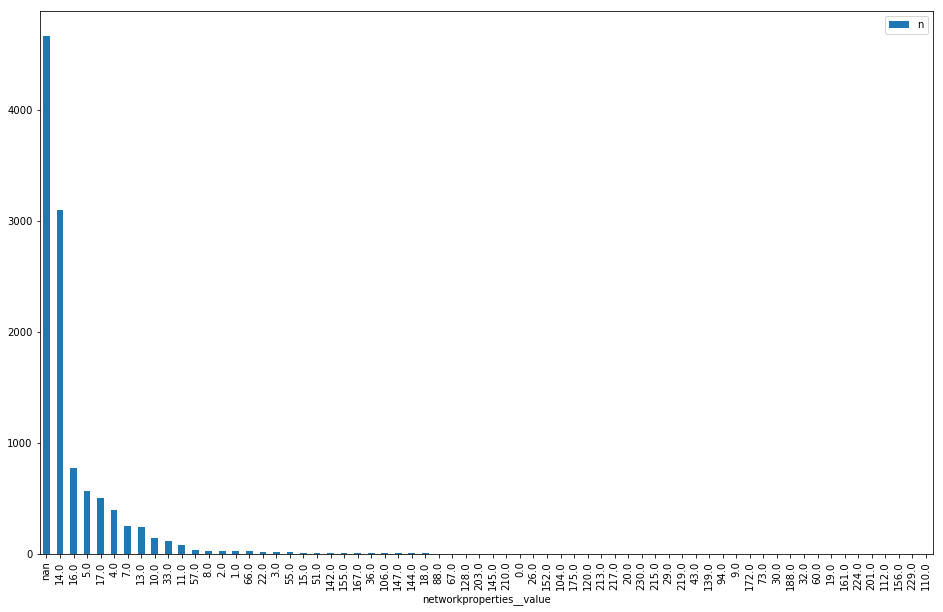

In [27]:

plt.rcParams["figure.figsize"] = [16,10]
bcs = bdocs.values('networkproperties__value').annotate(
    n = Count('pk')
)
bcdf =  pd.DataFrame.from_dict(list(bcs)).sort_values('n',ascending=False)

pdf = bcdf.set_index('networkproperties__value')
pdf.plot.bar()
plt.show()